In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
transactions_df = pd.read_csv('dataset/personal_transactions.csv')
budget_df = pd.read_csv('dataset/Budget.csv')

print("Transaction Data Shape:", transactions_df.shape)
transactions_df.head()

Transaction Data Shape: (806, 6)


,Date,Description,Amount,Transaction Type,Category,Account Name
0,01/01/2018,Amazon,11.11,debit,Shopping,Platinum Card
1,01/02/2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,01/02/2018,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,01/03/2018,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,01/04/2018,Netflix,11.76,debit,Movies & DVDs,Platinum Card


In [44]:
print("Transaction Data Info:")
transactions_df.info()

Transaction Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              806 non-null    object 
 1   Description       806 non-null    object 
 2   Amount            806 non-null    float64
 3   Transaction Type  806 non-null    object 
 4   Category          806 non-null    object 
 5   Account Name      806 non-null    object 
dtypes: float64(1), object(5)
memory usage: 37.9+ KB


In [45]:
print("\nBudget Data:")
budget_df.head()


Budget Data:


,Category,Budget
0,Alcohol & Bars,50
1,Auto Insurance,75
2,Coffee Shops,15
3,Electronics & Software,0
4,Entertainment,25


In [46]:
print("Transaction Amount Statistics:")
transactions_df['Amount'].describe()

Transaction Amount Statistics:


count     806.000000
mean      273.391489
std       667.630374
min         1.750000
25%        15.687500
50%        37.480000
75%       117.680000
max      9200.000000
Name: Amount, dtype: float64

In [48]:
transactions_df['Date'] = pd.to_datetime(transactions_df['Date'], format='%m/%d/%Y')

transactions_df = transactions_df.sort_values('Date').reset_index(drop=True)

transactions_df['Year'] = transactions_df['Date'].dt.year
transactions_df['Month'] = transactions_df['Date'].dt.month
transactions_df['Month_Name'] = transactions_df['Date'].dt.strftime('%B')
transactions_df['Day'] = transactions_df['Date'].dt.day
transactions_df['DayOfWeek'] = transactions_df['Date'].dt.day_name()
transactions_df['Week'] = transactions_df['Date'].dt.isocalendar().week

print("Date range:", transactions_df['Date'].min(), "to", transactions_df['Date'].max())
print("Total transactions:", len(transactions_df))

Date range: 2018-01-01 00:00:00 to 2019-09-30 00:00:00
Total transactions: 806


In [ ]:
debit_df = transactions_df[transactions_df['Transaction Type'] == 'debit'].copy()
credit_df = transactions_df[transactions_df['Transaction Type'] == 'credit'].copy()

print(f"Debit transactions: {len(debit_df)}")
print(f"Credit transactions: {len(credit_df)}")
print(f"\nTotal Debits: ${debit_df['Amount'].sum():,.2f}")
print(f"Total Credits: ${credit_df['Amount'].sum():,.2f}")

Debit transactions: 688
Credit transactions: 118

Total Debits: $96,083.78
Total Credits: $124,269.76


In [70]:
spending_by_category = debit_df[~debit_df['Category'].isin(['Credit Card Payment', 'Paycheck'])].groupby('Category').agg({
    'Amount': ['sum', 'mean', 'count']
}).round(2)

spending_by_category.columns = ['Total_Spent', 'Avg_Transaction', 'Transaction_Count']
spending_by_category = spending_by_category.sort_values('Total_Spent', ascending=False)

print("Spending by Category:")
spending_by_category

Spending by Category:


,Total_Spent,Avg_Transaction,Transaction_Count
Category,,,
Mortgage & Rent,24754.50,1178.79,21
Home Improvement,19092.87,530.36,36
Groceries,2795.21,26.62,105
Utilities,2776.00,44.06,63
Restaurants,2613.02,32.26,81
Shopping,1973.24,32.89,60
Gas & Fuel,1715.17,32.98,52
Mobile Phone,1680.40,80.02,21
Internet,1570.88,74.80,21


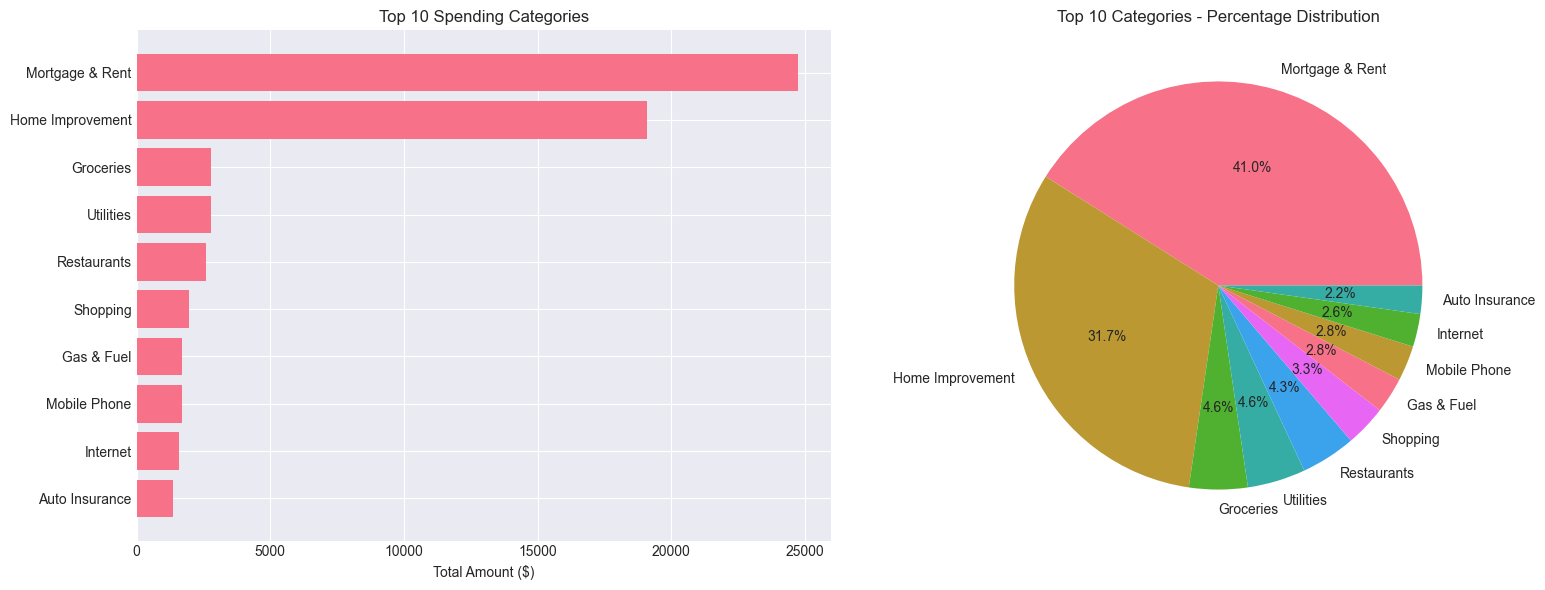

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

top_categories = spending_by_category.head(10)
axes[0].barh(top_categories.index, top_categories['Total_Spent'])
axes[0].set_xlabel('Total Amount ($)')
axes[0].set_title('Top 10 Spending Categories')
axes[0].invert_yaxis()

axes[1].pie(top_categories['Total_Spent'], labels=top_categories.index, autopct='%1.1f%%')
axes[1].set_title('Top 10 Categories - Percentage Distribution')

plt.tight_layout()
plt.show()

In [55]:
num_months = (transactions_df['Date'].max() - transactions_df['Date'].min()).days / 30.44

actual_spending = debit_df[~debit_df['Category'].isin(['Credit Card Payment', 'Paycheck'])].groupby('Category')['Amount'].sum() / num_months

budget_comparison = budget_df.set_index('Category').join(actual_spending.rename('Actual_Monthly_Avg'))
budget_comparison['Difference'] = budget_comparison['Actual_Monthly_Avg'] - budget_comparison['Budget']
budget_comparison['Percentage'] = (budget_comparison['Actual_Monthly_Avg'] / budget_comparison['Budget'] * 100).round(1)
budget_comparison = budget_comparison.sort_values('Difference', ascending=False)

print("Budget vs Actual Spending (Monthly Average):")
print(budget_comparison)

Budget vs Actual Spending (Monthly Average):
                        Budget  Actual_Monthly_Avg  Difference  Percentage
Category                                                                  
Home Improvement           250          912.381417  662.381417       365.0
Mortgage & Rent           1100         1182.930895   82.930895       107.5
Electronics & Software       0           34.358493   34.358493         inf
Mobile Phone                65           80.300433   15.300433       123.5
Movies & DVDs                0           10.617682   10.617682         inf
Gas & Fuel                  75           81.961970    6.961970       109.3
Fast Food                   15           15.799650    0.799650       105.3
Internet                    75           75.066856    0.066856       100.1
Music                       11           10.727591   -0.272409        97.5
Shopping                   100           94.294232   -5.705768        94.3
Coffee Shops                15            5.521252   -9

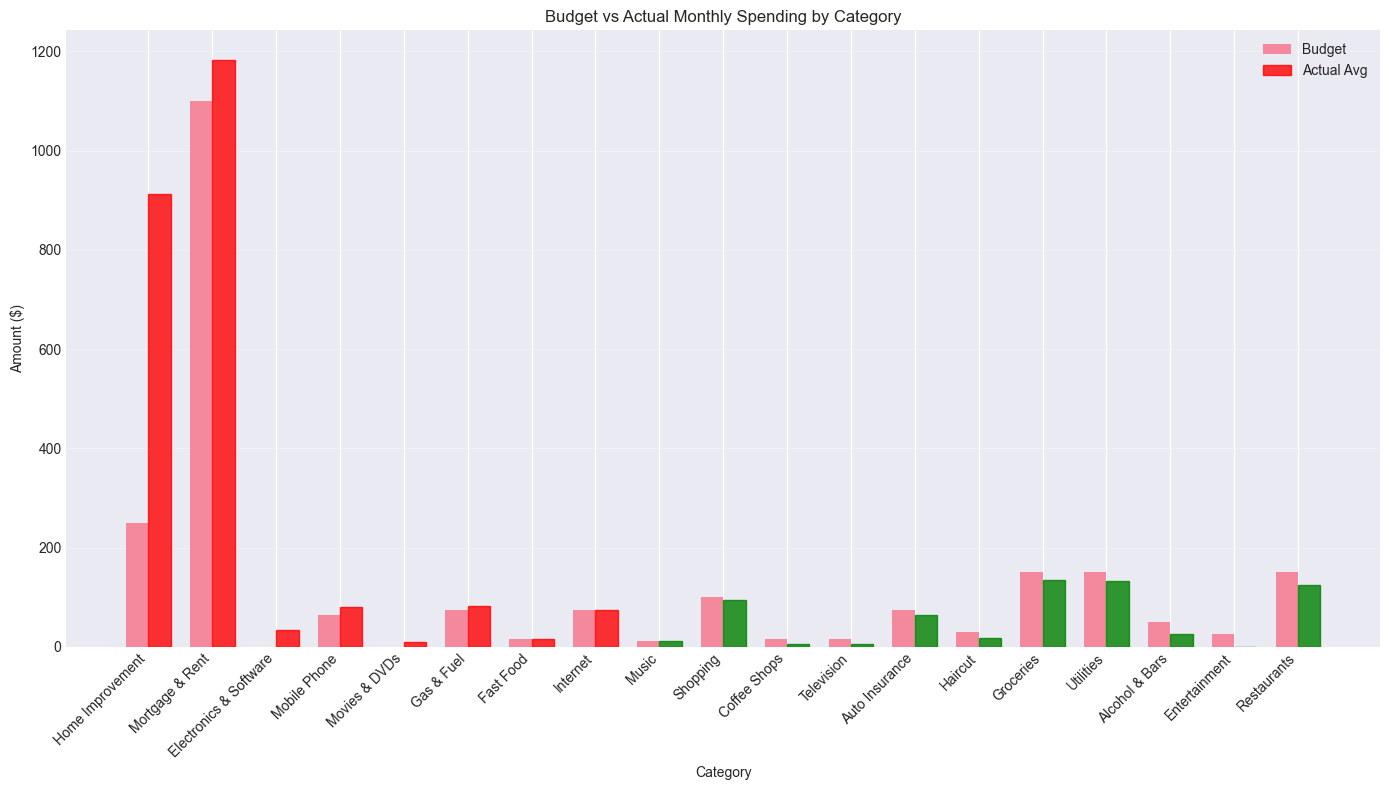


Categories Over Budget: 8
                        Budget  Actual_Monthly_Avg  Difference  Percentage
Category                                                                  
Home Improvement           250          912.381417  662.381417       365.0
Mortgage & Rent           1100         1182.930895   82.930895       107.5
Electronics & Software       0           34.358493   34.358493         inf
Mobile Phone                65           80.300433   15.300433       123.5
Movies & DVDs                0           10.617682   10.617682         inf
Gas & Fuel                  75           81.961970    6.961970       109.3
Fast Food                   15           15.799650    0.799650       105.3
Internet                    75           75.066856    0.066856       100.1


In [56]:
fig, ax = plt.subplots(figsize=(14, 8))

categories = budget_comparison.index
x = np.arange(len(categories))
width = 0.35

bars1 = ax.bar(x - width/2, budget_comparison['Budget'], width, label='Budget', alpha=0.8)
bars2 = ax.bar(x + width/2, budget_comparison['Actual_Monthly_Avg'], width, label='Actual Avg', alpha=0.8)

for i, bar in enumerate(bars2):
    if budget_comparison.iloc[i]['Difference'] > 0:
        bar.set_color('red')
    else:
        bar.set_color('green')

ax.set_xlabel('Category')
ax.set_ylabel('Amount ($)')
ax.set_title('Budget vs Actual Monthly Spending by Category')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

over_budget = budget_comparison[budget_comparison['Difference'] > 0]
print(f"\nCategories Over Budget: {len(over_budget)}")
if len(over_budget) > 0:
    print(over_budget[['Budget', 'Actual_Monthly_Avg', 'Difference', 'Percentage']])

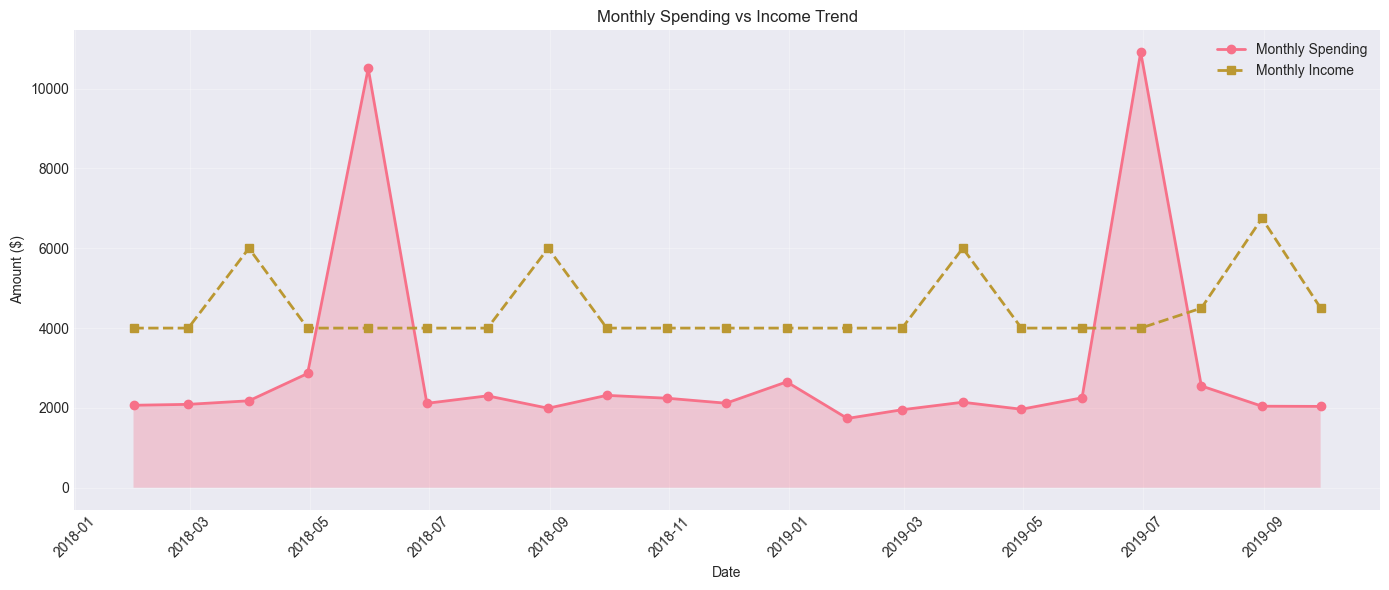

Average Monthly Spending: $3,002.02
Average Monthly Income: $4,464.29
Average Monthly Savings: $1,462.27


In [58]:
monthly_spending = debit_df[~debit_df['Category'].isin(['Credit Card Payment', 'Paycheck'])].groupby(
    pd.Grouper(key='Date', freq='M')
)['Amount'].sum()

monthly_income = credit_df[credit_df['Category'] == 'Paycheck'].groupby(
    pd.Grouper(key='Date', freq='M')
)['Amount'].sum()

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(monthly_spending.index, monthly_spending.values, marker='o', label='Monthly Spending', linewidth=2)
ax.plot(monthly_income.index, monthly_income.values, marker='s', label='Monthly Income', linewidth=2, linestyle='--')
ax.fill_between(monthly_spending.index, monthly_spending.values, alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('Amount ($)')
ax.set_title('Monthly Spending vs Income Trend')
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Average Monthly Spending: ${monthly_spending.mean():,.2f}")
print(f"Average Monthly Income: ${monthly_income.mean():,.2f}")
print(f"Average Monthly Savings: ${(monthly_income.mean() - monthly_spending.mean()):,.2f}")

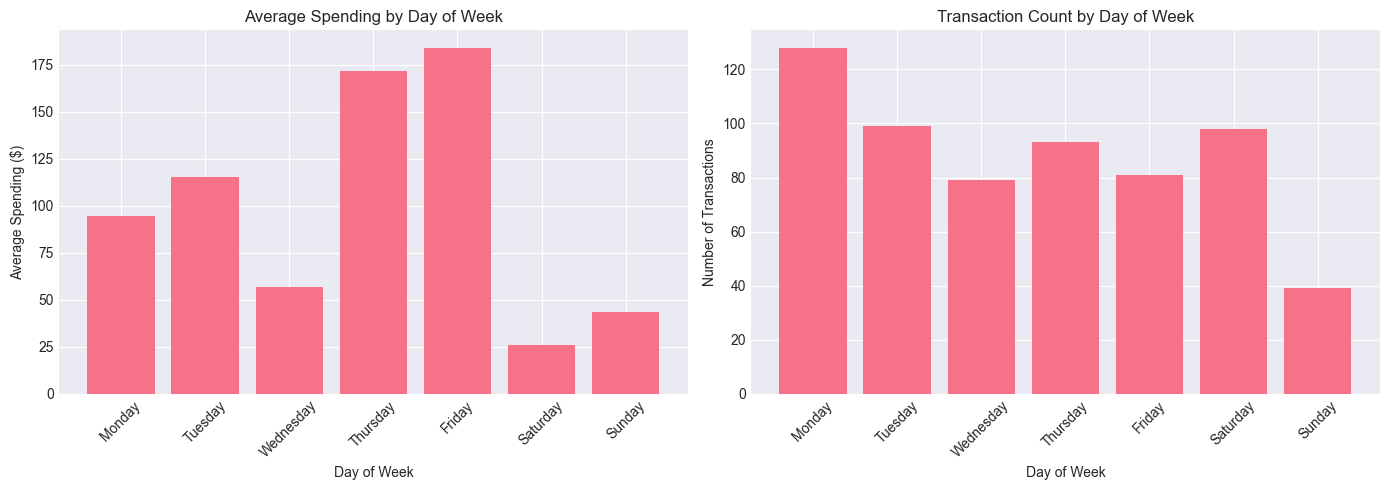

In [57]:

weekly_spending = debit_df[~debit_df['Category'].isin(['Credit Card Payment', 'Paycheck'])].groupby('DayOfWeek')['Amount'].agg(['sum', 'mean', 'count'])

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_spending = weekly_spending.reindex(day_order)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(weekly_spending.index, weekly_spending['mean'])
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Average Spending ($)')
axes[0].set_title('Average Spending by Day of Week')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(weekly_spending.index, weekly_spending['count'])
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Number of Transactions')
axes[1].set_title('Transaction Count by Day of Week')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

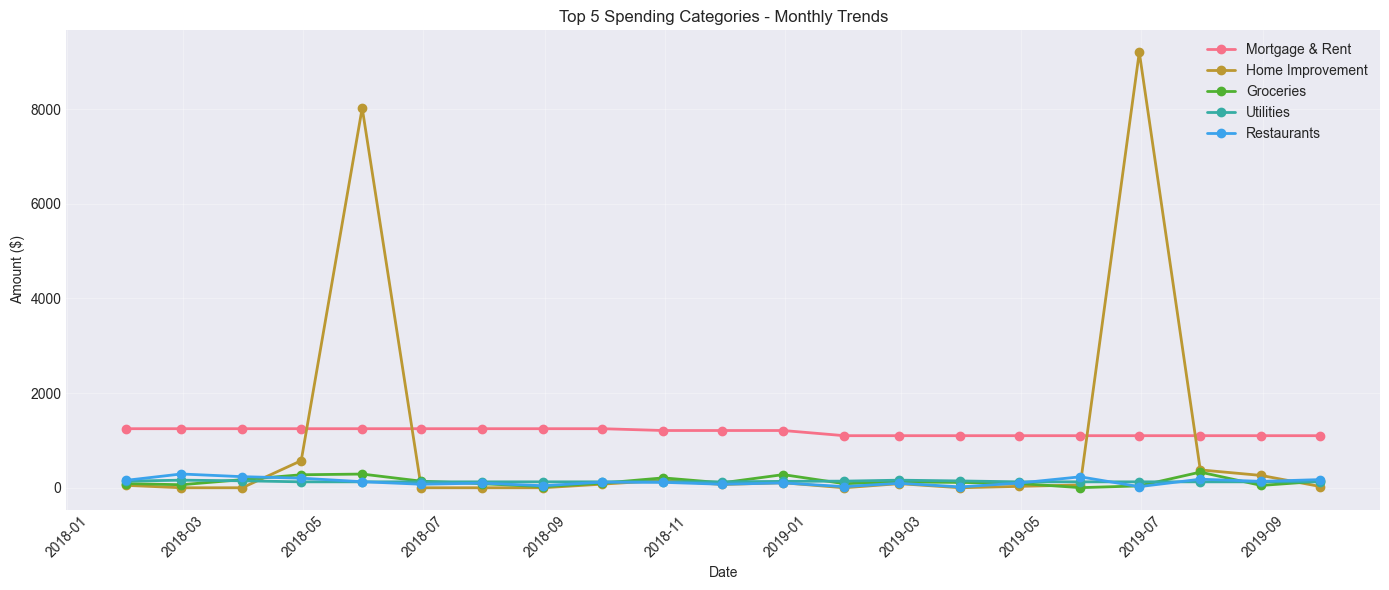

In [ ]:
top_5_categories = spending_by_category.head(5).index.tolist()

fig, ax = plt.subplots(figsize=(14, 6))

for category in top_5_categories:
    if category not in ['Credit Card Payment', 'Paycheck']:
        cat_data = debit_df[debit_df['Category'] == category].groupby(
            pd.Grouper(key='Date', freq='M')
        )['Amount'].sum()
        ax.plot(cat_data.index, cat_data.values, marker='o', label=category, linewidth=2)

ax.set_xlabel('Date')
ax.set_ylabel('Amount ($)')
ax.set_title('Top 5 Spending Categories - Monthly Trends')
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
def detect_anomalies(df, category):
    cat_df = df[df['Category'] == category].copy()
    
    if len(cat_df) < 5:
        return pd.DataFrame()
    
    Q1 = cat_df['Amount'].quantile(0.25)
    Q3 = cat_df['Amount'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    anomalies = cat_df[(cat_df['Amount'] < lower_bound) | (cat_df['Amount'] > upper_bound)]
    return anomalies

all_anomalies = []
for category in debit_df['Category'].unique():
    if category not in ['Credit Card Payment', 'Paycheck']:
        anomalies = detect_anomalies(debit_df, category)
        if len(anomalies) > 0:
            all_anomalies.append(anomalies)

if all_anomalies:
    anomalies_df = pd.concat(all_anomalies)
    anomalies_df = anomalies_df.sort_values('Amount', ascending=False)
    
    print(f"\nDetected {len(anomalies_df)} unusual transactions:")
    print(anomalies_df[['Date', 'Description', 'Amount', 'Category']].head(20))
else:
    print("No significant anomalies detected.")


Detected 43 unusual transactions:
          Date              Description   Amount          Category
676 2019-06-20  Mike's Construction Co.  9200.00  Home Improvement
170 2018-05-11  Mike's Construction Co.  8000.00  Home Improvement
688 2019-07-02           Hardware Store   229.90  Home Improvement
142 2018-04-24           Hardware Store   224.70  Home Improvement
246 2018-07-05                   Amazon   212.32          Shopping
144 2018-04-25           Hardware Store   210.79  Home Improvement
435 2018-12-03            Grocery Store   148.15         Groceries
797 2019-09-22       Seafood Restaurant   131.10       Restaurants
164 2018-05-06                   Amazon   117.69          Shopping
313 2018-09-02                   Amazon   109.83          Shopping
45  2018-02-11         Fancy Restaurant   106.80       Restaurants
684 2019-07-01            Grocery Store    99.47         Groceries
632 2019-05-13         Fancy Restaurant    98.19       Restaurants
694 2019-07-06            G

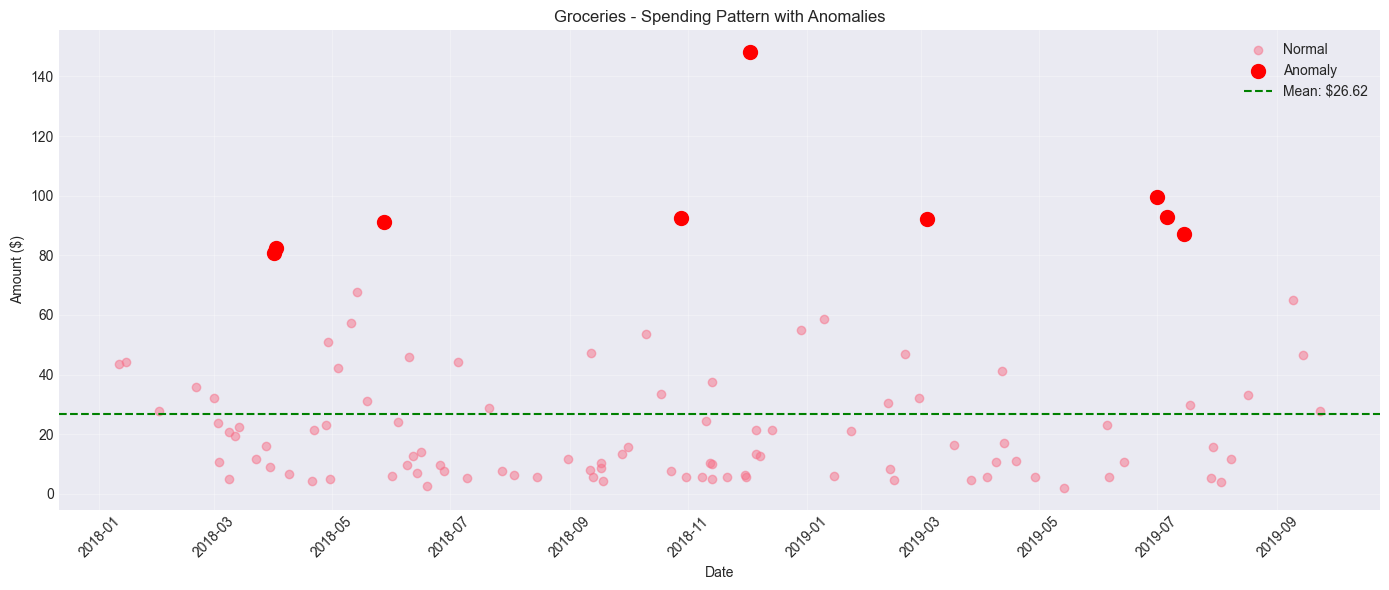

In [65]:
category_to_analyze = 'Groceries'

cat_df = debit_df[debit_df['Category'] == category_to_analyze].copy()
anomalies = detect_anomalies(debit_df, category_to_analyze)

fig, ax = plt.subplots(figsize=(14, 6))
ax.scatter(cat_df['Date'], cat_df['Amount'], alpha=0.5, label='Normal')

if len(anomalies) > 0:
    ax.scatter(anomalies['Date'], anomalies['Amount'], color='red', s=100, label='Anomaly', zorder=5)

ax.axhline(cat_df['Amount'].mean(), color='green', linestyle='--', label=f"Mean: ${cat_df['Amount'].mean():.2f}")
ax.set_xlabel('Date')
ax.set_ylabel('Amount ($)')
ax.set_title(f'{category_to_analyze} - Spending Pattern with Anomalies')
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Merchant Analysis

In [63]:
merchant_spending = debit_df[~debit_df['Category'].isin(['Credit Card Payment', 'Paycheck'])].groupby('Description').agg({
    'Amount': ['sum', 'count', 'mean']
}).round(2)

merchant_spending.columns = ['Total_Spent', 'Visits', 'Avg_Transaction']
merchant_spending = merchant_spending.sort_values('Total_Spent', ascending=False)

print("Top 15 Merchants by Total Spending:")
print(merchant_spending.head(15))

Top 15 Merchants by Total Spending:
                           Total_Spent  Visits  Avg_Transaction
Description                                                    
Mortgage Payment              24754.50      21          1178.79
Mike's Construction Co.       17200.00       2          8600.00
Grocery Store                  2764.33     103            26.84
Amazon                         1970.04      59            33.39
Hardware Store                 1892.87      34            55.67
Phone Company                  1680.40      21            80.02
Internet Service Provider      1570.88      21            74.80
State Farm                     1350.00      18            75.00
Power Company                  1260.00      21            60.00
Gas Company                     781.00      21            37.19
American Tavern                 760.24      24            31.68
City Water Charges              735.00      21            35.00
Best Buy                        719.00       4           179.75
BP  

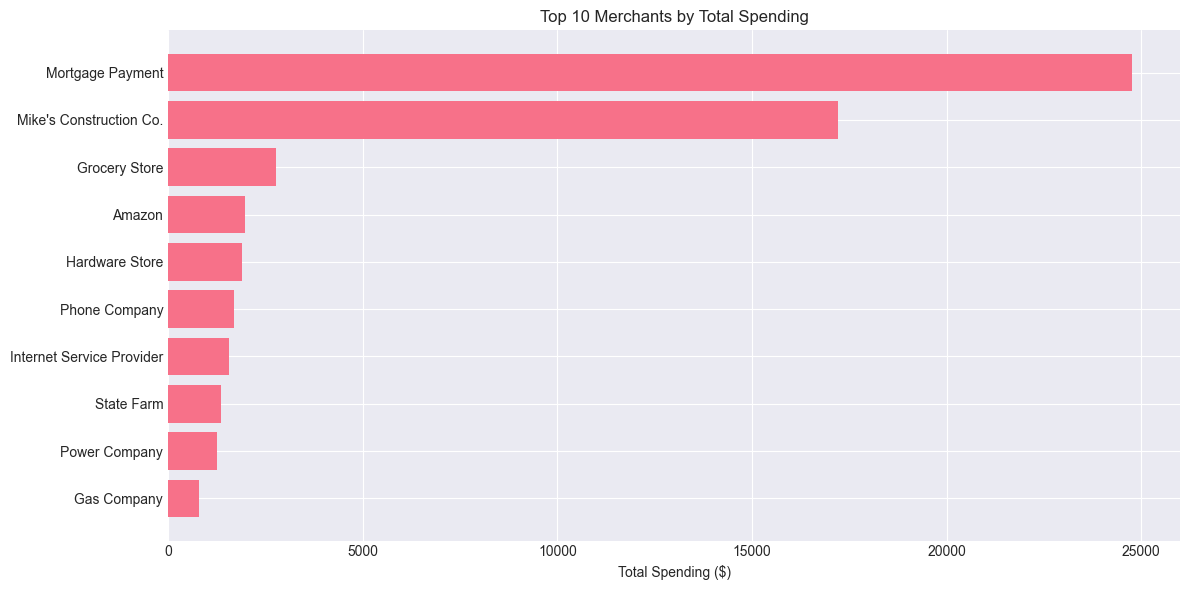

In [64]:
top_merchants = merchant_spending.head(10)

fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(top_merchants.index, top_merchants['Total_Spent'])
ax.set_xlabel('Total Spending ($)')
ax.set_title('Top 10 Merchants by Total Spending')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
account_spending = debit_df[~debit_df['Category'].isin(['Credit Card Payment', 'Paycheck'])].groupby('Account Name').agg({
    'Amount': ['sum', 'count', 'mean']
}).round(2)

account_spending.columns = ['Total_Spent', 'Transactions', 'Avg_Transaction']
account_spending = account_spending.sort_values('Total_Spent', ascending=False)

print("Spending by Account:")
print(account_spending)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].pie(account_spending['Total_Spent'], labels=account_spending.index, autopct='%1.1f%%')
axes[0].set_title('Total Spending by Account')

axes[1].bar(account_spending.index, account_spending['Transactions'])
axes[1].set_xlabel('Account')
axes[1].set_ylabel('Number of Transactions')
axes[1].set_title('Transaction Count by Account')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [62]:
print("KEY INSIGHTS - PERSONAL FINANCE ANALYSIS")

print("\nOVERALL SUMMARY")
print(f"  • Date Range: {transactions_df['Date'].min().strftime('%B %Y')} to {transactions_df['Date'].max().strftime('%B %Y')}")
print(f"  • Total Transactions: {len(transactions_df)}")
print(f"  • Total Income: ${credit_df['Amount'].sum():,.2f}")
print(f"  • Total Spending: ${debit_df['Amount'].sum():,.2f}")
print(f"  • Net Savings: ${(credit_df['Amount'].sum() - debit_df['Amount'].sum()):,.2f}")

print("\nMONTHLY AVERAGES")
print(f"  • Average Monthly Income: ${monthly_income.mean():,.2f}")
print(f"  • Average Monthly Spending: ${monthly_spending.mean():,.2f}")
print(f"  • Average Monthly Savings: ${(monthly_income.mean() - monthly_spending.mean()):,.2f}")
print(f"  • Savings Rate: {((monthly_income.mean() - monthly_spending.mean()) / monthly_income.mean() * 100):.1f}%")

print("\nTOP SPENDING CATEGORIES")
for idx, (category, row) in enumerate(spending_by_category.head(5).iterrows(), 1):
    print(f"  {idx}. {category}: ${row['Total_Spent']:,.2f} ({row['Transaction_Count']:.0f} transactions)")

print("\nBUDGET ALERTS")
over_budget_count = len(budget_comparison[budget_comparison['Difference'] > 0])
if over_budget_count > 0:
    print(f"  • {over_budget_count} categories are over budget")
    for category, row in budget_comparison[budget_comparison['Difference'] > 0].head(3).iterrows():
        print(f"    - {category}: {row['Percentage']:.0f}% of budget (${row['Difference']:.2f} over)")
else:
    print("  • All categories are within budget!")

print("\nSPENDING PATTERNS")
busiest_day = weekly_spending['count'].idxmax()
highest_spending_day = weekly_spending['mean'].idxmax()
print(f"  • Busiest day: {busiest_day} ({weekly_spending.loc[busiest_day, 'count']:.0f} avg transactions)")
print(f"  • Highest spending day: {highest_spending_day} (${weekly_spending.loc[highest_spending_day, 'mean']:.2f} avg)")

if 'anomalies_df' in locals() and len(anomalies_df) > 0:
    print(f"\nANOMALY DETECTION")
    print(f"  • Detected {len(anomalies_df)} unusual transactions")
    print(f"  • Largest anomaly: ${anomalies_df['Amount'].max():,.2f} at {anomalies_df.loc[anomalies_df['Amount'].idxmax(), 'Description']}")

KEY INSIGHTS - PERSONAL FINANCE ANALYSIS

OVERALL SUMMARY
  • Date Range: January 2018 to September 2019
  • Total Transactions: 806
  • Total Income: $124,269.76
  • Total Spending: $96,083.78
  • Net Savings: $28,185.98

MONTHLY AVERAGES
  • Average Monthly Income: $4,464.29
  • Average Monthly Spending: $3,002.02
  • Average Monthly Savings: $1,462.27
  • Savings Rate: 32.8%

TOP SPENDING CATEGORIES
  1. Mortgage & Rent: $24,754.50 (21 transactions)
  2. Home Improvement: $19,092.87 (36 transactions)
  3. Groceries: $2,795.21 (105 transactions)
  4. Utilities: $2,776.00 (63 transactions)
  5. Restaurants: $2,613.02 (81 transactions)

BUDGET ALERTS
  • 8 categories are over budget
    - Home Improvement: 365% of budget ($662.38 over)
    - Mortgage & Rent: 108% of budget ($82.93 over)
    - Electronics & Software: inf% of budget ($34.36 over)

SPENDING PATTERNS
  • Busiest day: Monday (128 avg transactions)
  • Highest spending day: Friday ($183.96 avg)

ANOMALY DETECTION
  • Detecte

In [ ]:
daily_spending = debit_df[~debit_df['Category'].isin(['Credit Card Payment', 'Paycheck'])].groupby('Date')['Amount'].sum().reset_index()
daily_spending.columns = ['ds', 'y']

print("Daily Spending Data for Prophet:")
print(daily_spending.head())
print(f"\nShape: {daily_spending.shape}")

daily_spending.to_csv('dataset/daily_spending_for_prophet.csv', index=False)
print("\nSaved to 'dataset/daily_spending_for_prophet.csv'")

Daily Spending Data for Prophet:
          ds        y
0 2018-01-01    11.11
1 2018-01-02  1271.66
2 2018-01-04    11.76
3 2018-01-05    25.85
4 2018-01-06    18.45

Shape: (387, 2)

Saved to 'dataset/daily_spending_for_prophet.csv'


In [66]:
category_monthly = debit_df[~debit_df['Category'].isin(['Credit Card Payment', 'Paycheck'])].groupby(
    [pd.Grouper(key='Date', freq='M'), 'Category']
)['Amount'].sum().reset_index()

print("Category-wise Monthly Data for LSTM:")
print(category_monthly.head(15))
print(f"\nShape: {category_monthly.shape}")

category_monthly.to_csv('dataset/category_monthly_for_lstm.csv', index=False)
print("\nSaved to 'dataset/category_monthly_for_lstm.csv'")

Category-wise Monthly Data for LSTM:
         Date          Category   Amount
0  2018-01-31      Coffee Shops     3.00
1  2018-01-31         Fast Food    32.91
2  2018-01-31        Gas & Fuel    65.29
3  2018-01-31         Groceries    87.73
4  2018-01-31  Home Improvement    51.21
5  2018-01-31          Internet    69.99
6  2018-01-31      Mobile Phone    89.46
7  2018-01-31   Mortgage & Rent  1247.44
8  2018-01-31     Movies & DVDs    11.76
9  2018-01-31             Music    10.69
10 2018-01-31       Restaurants   156.80
11 2018-01-31          Shopping   100.37
12 2018-01-31         Utilities   140.00
13 2018-02-28    Alcohol & Bars    14.00
14 2018-02-28      Coffee Shops     6.00

Shape: (298, 3)

Saved to 'dataset/category_monthly_for_lstm.csv'
